<a href="https://colab.research.google.com/github/VidyaPedapothu/cs480student/blob/main/Copy_of_CS480_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

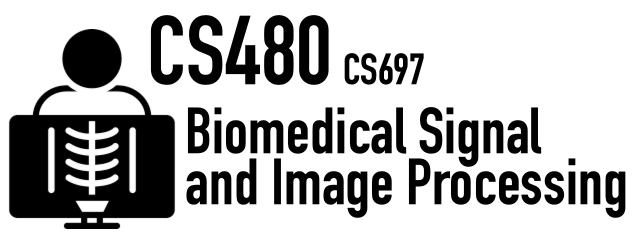
#Assignment 4

In [121]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia!

In [122]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [123]:
# we are using mahotas again, so lets install it!
!pip install mahotas

In [124]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier

**Task 1:** Download, extract, and load the data! [15 Points]

In [125]:
# Please download this file: https://cs480.org/data/xray.zip
# This is a subset of the Kaggle Pneumonia Dataset!
#
# TODO: Upload xray.zip using the file panel on the left.

In [126]:
# Run this code to extract the zip file and to create
# the folder structure of normal/ and pneumonia/ images.
# Each folder contains the first images of the Kaggle dataset.
import zipfile
with zipfile.ZipFile('xray.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

NORMAL_DIR = 'normal/'
PNEUMONIA_DIR = 'pneumonia/'

In [127]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

In [128]:
# TODO: Please display this image and print the dimensions!

In [129]:
# TODO: YOUR CODE

Image Dimensions are (1858, 2090)


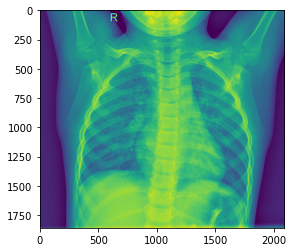

In [130]:
from PIL import Image
imshow(img)
print ("Image Dimensions are", img.shape)

**Task 2:** Let's do some data wrangling and more visualization! [35 Points]

In [131]:
# This code loads all normal images into a numpy array.
normal_files = os.listdir( NORMAL_DIR )

normal_images = np.zeros( (len(normal_files), 300, 300), dtype=np.float32)

for i in range(len(normal_files)):
  loaded_image = mh.imread( NORMAL_DIR + normal_files[i], as_grey=True )

  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  normal_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [132]:
# This code loads all pneumonia images into a numpy array.
pneumonia_files = os.listdir( PNEUMONIA_DIR )

pneumonia_images = np.zeros( (len(pneumonia_files), 300, 300), dtype=np.float32)

for i in range(len(pneumonia_files)):
  loaded_image = mh.imread( PNEUMONIA_DIR + pneumonia_files[i], as_grey=True )
  
  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  pneumonia_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [133]:
# The two code blocks above perform 2 data wrangling operations.
# Which ones?
# Hint: The first one might be more obvious but the second one happens in the
# last line of each block.
# TODO: Operation 1) YOUR ANSWER
# TODO: Operation 2) YOUR ANSWER

In [134]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

In [135]:
# TODO: YOUR CODE

<Figure size 432x288 with 0 Axes>

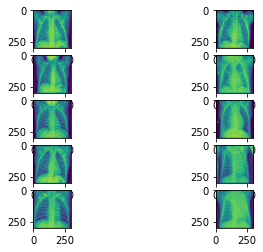

In [136]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(5,2) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0][0].imshow(normal_images[0])
axarr[1][0].imshow(normal_images[1])
axarr[2][0].imshow(normal_images[2])
axarr[3][0].imshow(normal_images[3])
axarr[4][0].imshow(normal_images[4])
axarr[0][1].imshow(pneumonia_images[0])
axarr[1][1].imshow(pneumonia_images[1])
axarr[2][1].imshow(pneumonia_images[2])
axarr[3][1].imshow(pneumonia_images[3])
axarr[4][1].imshow(pneumonia_images[4])


**Task 3:** Setup training and testing data. [15 Points]

In [137]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays and pneumonia xrays.
#
# The training data will include 120 images (60 normal, 60 pneumonia).
# The testing data will include the remaining 80 images (40 normal, 40 pneumonia).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the training_target vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia.

In [138]:
TRAINING_COUNT = 60

training_data = np.zeros( (TRAINING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[0:TRAINING_COUNT] ):
  training_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[0:TRAINING_COUNT] ):
  training_data[i + TRAINING_COUNT] = p.ravel()

In [139]:
training_target = np.concatenate((np.zeros(TRAINING_COUNT),np.ones(TRAINING_COUNT)))


In [140]:
# TODO: Please create the training_target vector with 0 for a normal image, and
# 1 for a pneumonia.


In [141]:
TESTING_COUNT = 40

testing_data = np.zeros( (TESTING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i + TESTING_COUNT] = p.ravel()

In [142]:
# TODO: Please create the testing_target vector with 0 for a normal image, and
# 1 for a pneumonia.
# TODO

In [143]:
testing_target =np.concatenate((np.zeros(TESTING_COUNT),np.ones(TESTING_COUNT)))

**Task 4:** Let's train and evaluate the Random Forest! [35 Points]

In [144]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()

In [145]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is 
# normal or pneumonia.
fitted = clf.fit( training_data, training_target )

In [146]:
# TODO: In just a few sentences, please explain how the Random Forest works.

The random forest is a classification algorithm consisting of many decision trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of  trees whose prediction by committee is more accurate than that of any individual tree. 

In [147]:
# TODO: YOUR ANSWER

In [148]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf.score( testing_data, testing_target )

0.9375

In [149]:
# TODO: Is the classification accuracy good? And, are you surprised?

In [150]:
# TODO: YOUR ANSWER

classification accuracy is number of correct predictions divided by the total number of predictions.
 Classification accuracy is good but in healthcare it shouldbe more accurate.

**Bonus:** Let's take a closer look! [33 Points]

In [151]:
# Can you figure out which images were misclassified?
# Hint: You can use predictions = clf.predict(testing_data) for this.
# Can you display them?
# Do you have an idea why these images were problematic?

In [152]:
predictions = clf.predict(testing_data)
predictions



array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [153]:
import pandas as pd
m = clf.predict(testing_data) != testing_target


In [154]:
m


array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [155]:
# TODO: How can we improve the classification performance?
# Hint: Ideas without code are fine as well.

In [156]:
# TODO: YOUR ANSWER

CNN is one of the best choice when it comes to the classification improvement performance. Though the Random forest having an accuracy above 85% is known to be good but there is still lot of scope to improve it accuracy to above 90% using CNN or similar.



In [157]:
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw

Colabaration with kiran